We used the kagglehub package to download the "Knee Osteoarthritis Classification" dataset from Kaggle. The dataset was saved to a local directory, and we printed the path to access the stored files for further analysis or model training.


In [ ]:
import kagglehub

# Uploading dataset from kaggle
path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

print("Path to dataset files:", path)

100%|██████████| 32.7M/32.7M [00:02<00:00, 16.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1


 we imported several essential libraries to handle image processing and preparation for deep learning tasks.
 1. The os module allows us to interact with the operating system, such as navigating directories and managing file paths.
 2. The cv2 module from OpenCV is used for reading, modifying, and saving images, making it useful for various image processing operations.
 3. Using the glob module helps us retrieve file paths that match specific patterns, which is useful when working with large datasets. 4. We imported ImageDataGenerator from TensorFlow’s Keras module, which is used to perform image augmentation, such as rotation, flipping, and scaling, enhancing model performance and reducing overfitting during training.


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1"

In this code, we first check the available classes (subdirectories) within the dataset by listing all folders present in the dataset_path directory using os.listdir(). This helps us identify the different categories of images. We then loop through each class to count how many images are present in each category. For each class, we use the glob function to find all image files with the .jpeg extension by constructing the file path with os.path.join(). This process is useful for understanding dataset balance, which is crucial for training machine learning models effectively.


In [ ]:
# Check available classes
classes = os.listdir(dataset_path)
print("Classes:", classes)

# Count images in each category
for c in classes:
    images = glob(os.path.join(dataset_path, c, "*.jpeg"))  # Change extension if needed
    print(f"Class {c}: {len(images)} images")


Classes: ['Knee Osteoarthritis Classification']
Class Knee Osteoarthritis Classification: 0 images


The code specifies the dataset path and lists the main directories using os.listdir(). It then iterates through each folder, checks if it's a directory using os.path.isdir(), and prints the folder name along with its contents. This helps us understand the dataset's structure for further processing or model trai

In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification"

# List the main directories inside the dataset
print("Folders in dataset:", os.listdir(dataset_path))

# Check contents of each folder
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        print(f"Checking folder: {folder}")
        print("Contents:", os.listdir(folder_path))


Folders in dataset: ['train', 'val', 'test']
Checking folder: train
Contents: ['Osteoporosis', 'Osteopenia', 'Normal']
Checking folder: val
Contents: ['Osteoporosis', 'Osteopenia', 'Normal']
Checking folder: test
Contents: ['Osteoporosis', 'Osteopenia', 'Normal']


The code sets paths for train, validation, and test folders, counts images in each using glob.glob(), and prints the totals. It also shows a sample image path if available, helping verify dataset structure.

In [ ]:
import glob

train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

# Check if images exist inside the train folder
train_images = glob.glob(os.path.join(train_path, "*", "*.*"))
val_images = glob.glob(os.path.join(val_path, "*", "*.*"))
test_images = glob.glob(os.path.join(test_path, "*", "*.*"))

print(f"Found {len(train_images)} training images")
print(f"Found {len(val_images)} validation images")
print(f"Found {len(test_images)} test images")


if train_images:
    print("Sample train image:", train_images[0])


Found 3780 training images
Found 1080 validation images
Found 540 test images
Sample train image: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/train/Osteoporosis/Osteoporosis 290.png


The code loads a sample image from the training set using OpenCV (cv2.imread()), checks if it's successfully loaded, and converts it from BGR to RGB format for correct color display. It then uses Matplotlib to display the image without axis labels and with a title, helping visually confirm image loading and dataset integrity.

Loading image: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/train/Osteoporosis/Osteoporosis 290.png


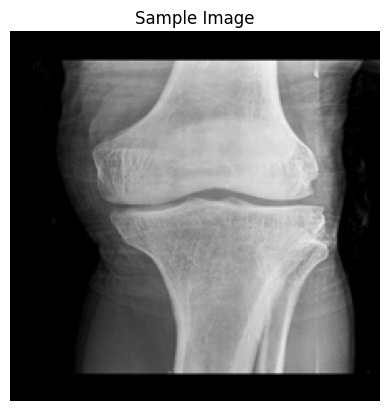

In [ ]:
import cv2
import matplotlib.pyplot as plt

if train_images:
    sample_img_path = train_images[0]
    print("Loading image:", sample_img_path)

    img = cv2.imread(sample_img_path)
    if img is None:
        print("Error: Unable to load image!")
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title("Sample Image")
        plt.show()


The code defines the base dataset path and constructs paths for the train, validation, and test folders. It then lists and prints the subfolders within each dataset split, helping verify the dataset's structure and class organization.

In [ ]:
# Base dataset path
dataset_path = "/root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification"

# Train, Val, Test Paths
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
test_path = os.path.join(dataset_path, "test")

# Verify dataset folders
print("Train folders:", os.listdir(train_path))
print("Val folders:", os.listdir(val_path))
print("Test folders:", os.listdir(test_path))


Train folders: ['Osteoporosis', 'Osteopenia', 'Normal']
Val folders: ['Osteoporosis', 'Osteopenia', 'Normal']
Test folders: ['Osteoporosis', 'Osteopenia', 'Normal']


The preprocess_image() function loads an image from the given path, converts it to RGB format, resizes it to the specified dimensions (default: 224x224), and normalizes pixel values to the range [0, 1].

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    """Loads an image, resizes it, normalizes pixel values"""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, target_size)  # Resize
    img = img / 255.0  # Normalize (0-1)
    return img


The show_resizing_difference() function randomly selects an image from the specified folder, displays it before and after resizing to 400x400, and visualizes the pixel differences. It first gathers image paths, reads a random image, and converts it to RGB for correct display. The image is resized to 400x400, then resized back to its original dimensions. The pixel-wise difference between the original and resized-back image is calculated and shown as a grayscale "difference map." This helps analyze information loss or distortion due to resizing.

Selected image: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/train/Normal/Normal 95_aug_0.jpeg
Original Image Shape: (224, 224, 3)


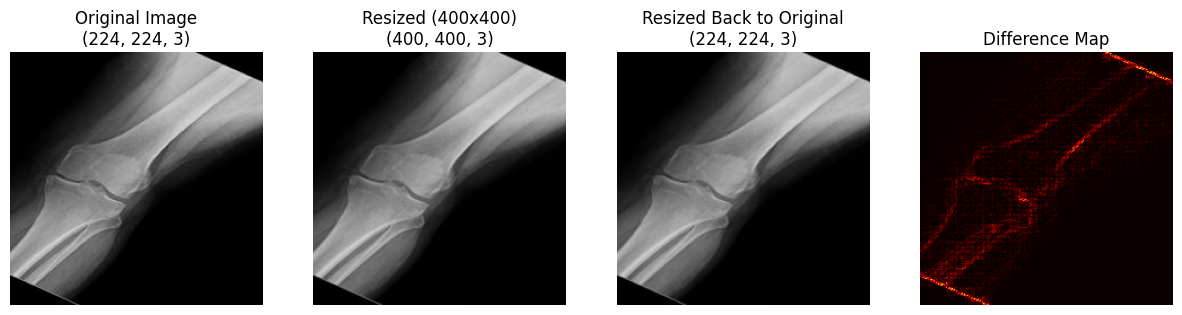

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random

# Set new target size
TARGET_SIZE = (400, 400)

def show_resizing_difference(folder_path):
    """Displays an image before and after resizing, and visualizes the difference."""


    image_paths = []
    for ext in ["*.jpg", "*.jpeg", "*.png"]:
        image_paths.extend(glob.glob(os.path.join(folder_path, "*", ext)))

    if not image_paths:
        print("No images found in dataset!")
        return


    img_path = random.choice(image_paths)
    print(f"Selected image: {img_path}")


    img = cv2.imread(img_path)
    if img is None:
        print("Error: Unable to load image.")
        return


    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    original_shape = img_rgb.shape
    print(f"Original Image Shape: {original_shape}")


    img_resized = cv2.resize(img_rgb, TARGET_SIZE)


    img_resized_back = cv2.resize(img_resized, (original_shape[1], original_shape[0]))


    difference = cv2.absdiff(img_rgb, img_resized_back)


    difference_gray = cv2.cvtColor(difference, cv2.COLOR_RGB2GRAY)


    fig, axes = plt.subplots(1, 4, figsize=(15, 5))

    axes[0].imshow(img_rgb)
    axes[0].set_title(f"Original Image\n{original_shape}")
    axes[0].axis("off")

    axes[1].imshow(img_resized)
    axes[1].set_title(f"Resized (400x400)\n{img_resized.shape}")
    axes[1].axis("off")

    axes[2].imshow(img_resized_back)
    axes[2].set_title(f"Resized Back to Original\n{original_shape}")
    axes[2].axis("off")

    axes[3].imshow(difference_gray, cmap='hot')
    axes[3].set_title("Difference Map")
    axes[3].axis("off")

    plt.show()


show_resizing_difference(train_path)


The display_images() function shows sample images from each class folder in a given directory. It first identifies all class folders and collects image paths with .jpg, .jpeg, or .png extensions. For each class, it displays a specified number of images (default: 5) after preprocessing them. Images are shown in a grid with class names as titles, providing a quick visual overview of the dataset's structure and content.

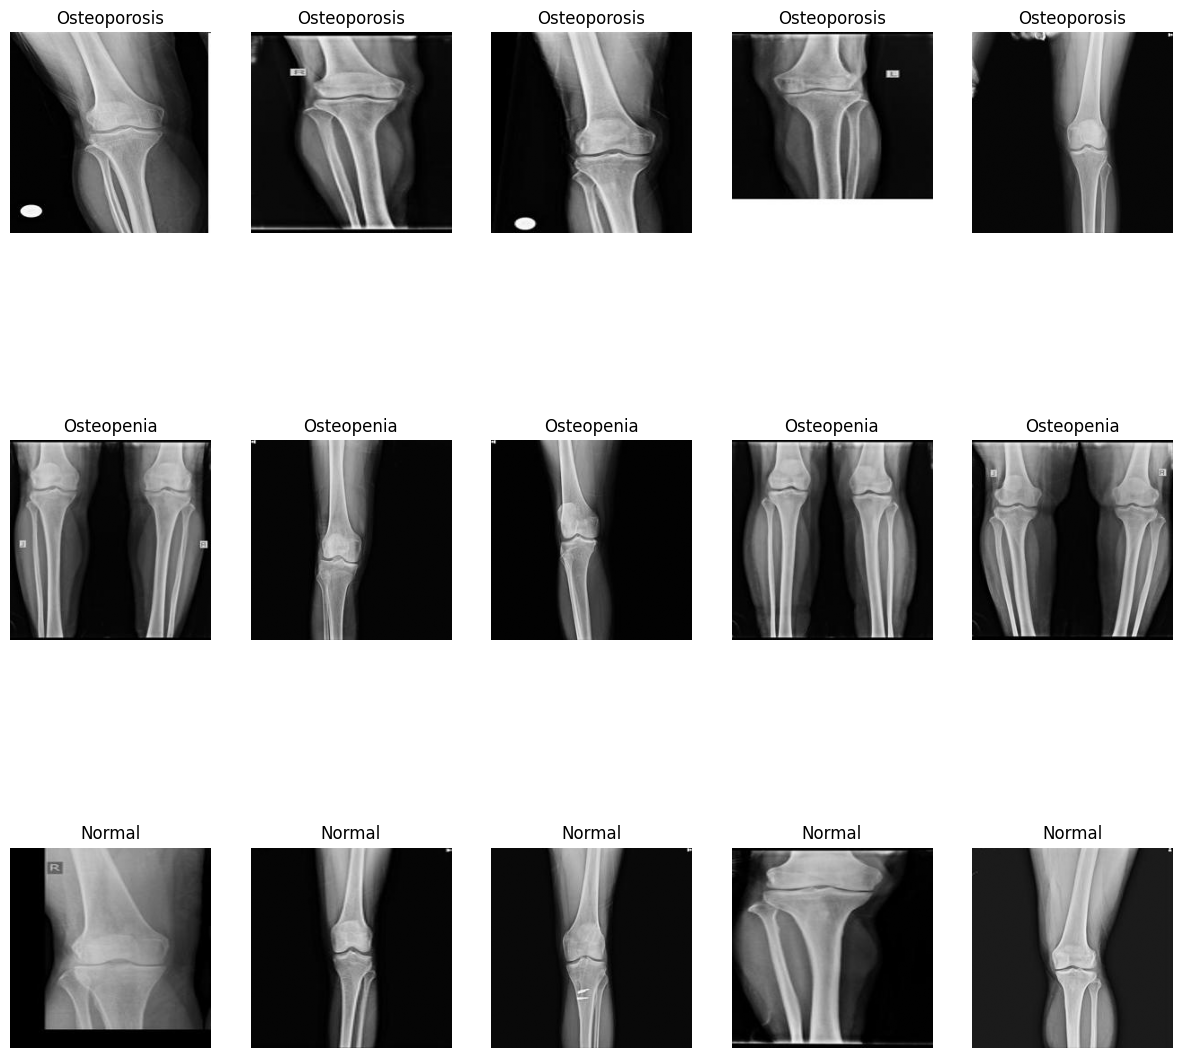

In [ ]:
import glob

def display_images(folder_path, num_images=5):
    """Displays sample images from a given folder"""
    class_folders = os.listdir(folder_path)
    class_folders = [c for c in class_folders if os.path.isdir(os.path.join(folder_path, c))]

    fig, axes = plt.subplots(len(class_folders), num_images, figsize=(15, 5 * len(class_folders)))

    for i, class_name in enumerate(class_folders):
        # Collect all image formats
        image_paths = []
        for ext in ["*.jpg", "*.jpeg", "*.png"]:
            image_paths.extend(glob.glob(os.path.join(folder_path, class_name, ext)))

        image_paths = image_paths[:num_images]  # Limit to num_images

        for j, img_path in enumerate(image_paths):
            img = preprocess_image(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            axes[i, j].set_title(class_name)

    plt.show()

# Try again
display_images(train_path)


The display_images_with_conversions() function randomly selects an image from the specified folder and displays it in BGR (original), RGB, HSV, and LAB color spaces. It gathers image paths, loads a random image, converts it to different color formats using cv2.cvtColor(), and visualizes them side by side using Matplotlib. This helps analyze how the image appears across various color representations.

Displaying image: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/train/Normal/Normal 428.jpg


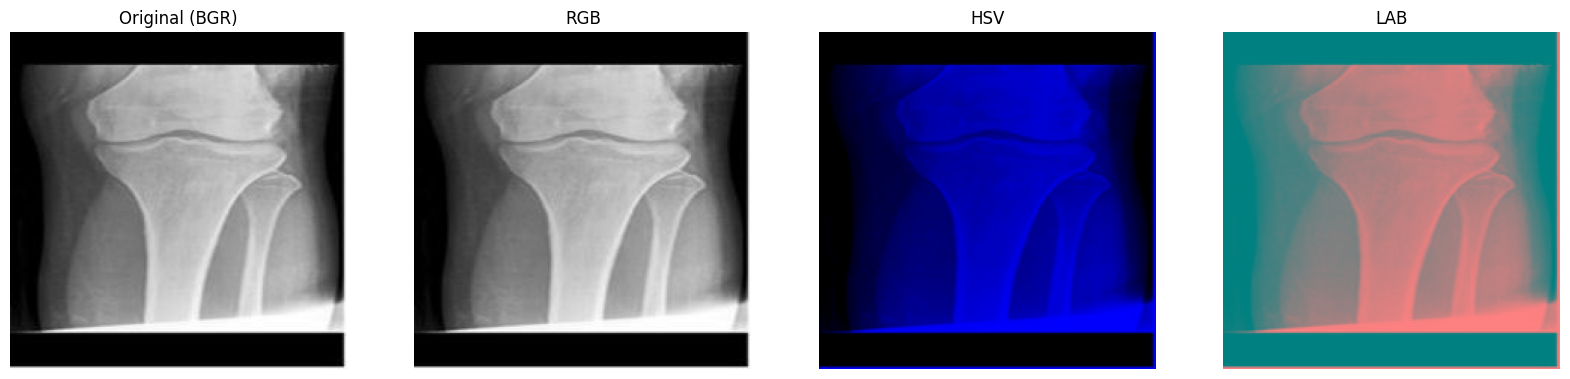

In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import random

def display_images_with_conversions(folder_path):
    """Displays an image in RGB, HSV, and LAB color spaces"""


    image_paths = []
    for ext in ["*.jpg", "*.jpeg", "*.png"]:
        image_paths.extend(glob.glob(os.path.join(folder_path, "*", ext)))

    if not image_paths:
        print("No images found in dataset!")
        return


    img_path = random.choice(image_paths)
    print(f"Displaying image: {img_path}")


    img = cv2.imread(img_path)
    if img is None:
        print("Error: Unable to load image.")
        return


    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)


    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original (BGR)")
    axes[0].axis("off")

    axes[1].imshow(img_rgb)
    axes[1].set_title("RGB")
    axes[1].axis("off")

    axes[2].imshow(img_hsv)
    axes[2].set_title("HSV")
    axes[2].axis("off")

    axes[3].imshow(img_lab)
    axes[3].set_title("LAB")
    axes[3].axis("off")

    plt.show()

display_images_with_conversions(train_path)


The plot_training_class_distribution() function counts the number of images in each class folder within the training dataset and visualizes the distribution using a bar chart. It iterates through class directories, records image counts, and plots them with labeled axes and a rotated x-axis for better readability. This helps assess class balance in the dataset.


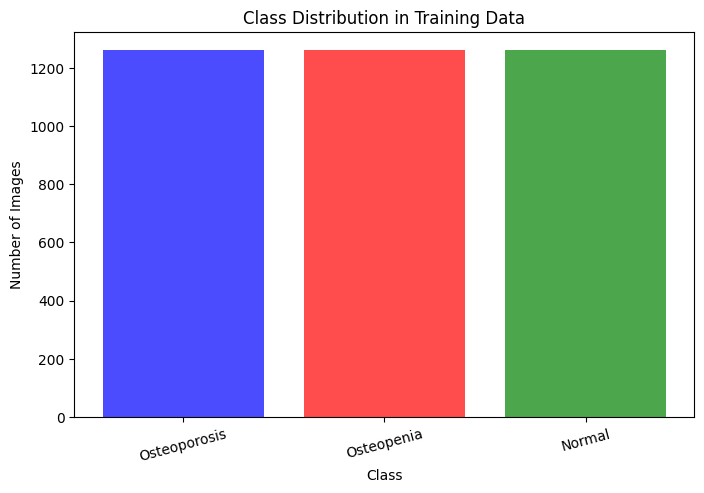

In [ ]:
import os
import matplotlib.pyplot as plt

def plot_training_class_distribution(train_path):
    """Plots a bar chart showing the number of images per class in the training dataset."""
    class_counts = {}


    for class_name in os.listdir(train_path):
        class_folder = os.path.join(train_path, class_name)
        if os.path.isdir(class_folder):
            class_counts[class_name] = len(os.listdir(class_folder))

    # bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'red', 'green'], alpha=0.7)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution in Training Data")
    plt.xticks(rotation=15)
    plt.show()


plot_training_class_distribution(train_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os


In [ ]:
import os
import kagglehub

# Step 1: Download the dataset from Kaggle
dataset_path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

# Step 2: Add the subfolder name if needed
dataset_path = os.path.join(dataset_path, "Knee Osteoarthritis Classification")

# Step 3: Set train, val, test paths
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

# Check if the folders exist
print("Train path:", train_dir)
print("Val path:", val_dir)
print("Test path:", test_dir)


100%|██████████| 32.7M/32.7M [00:02<00:00, 13.2MB/s]

Extracting files...


Train path: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/train
Val path: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/val
Test path: /root/.cache/kagglehub/datasets/fuyadhasanbhoyan/knee-osteoarthritis-classification-224224/versions/1/Knee Osteoarthritis Classification/test


In [ ]:
# Paths
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

# Parameters
img_size = (200,200)
batch_size = 32
num_classes = 3  # Normal, Osteoarthritis, Osteopenia


In [ ]:
# Apply data augmentation to training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Validation & test data just normalized
val_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # for multi-class
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history_cnn = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3  # increase for better results
)


Epoch 1/3
119/119 ━━━━━━━━━━━━━━━━━━━━ 51s 379ms/step - accuracy: 0.4491 - loss: 1.0821 - val_accuracy: 0.6019 - val_loss: 0.9181
Epoch 2/3
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - accuracy: 0.5326 - loss: 0.9193 - val_accuracy: 0.5463 - val_loss: 0.9386
Epoch 3/3
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.5612 - loss: 0.8900 - val_accuracy: 0.5833 - val_loss: 0.9041


In [ ]:
# Prepare test data
test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


Found 540 images belonging to 3 classes.
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.6455 - loss: 0.7944
Test Accuracy: 0.60


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Epoch 1/3
119/119 ━━━━━━━━━━━━━━━━━━━━ 71s 511ms/step - accuracy: 0.4705 - loss: 1.2988 - val_accuracy: 0.5231 - val_loss: 0.9937
Epoch 2/3
119/119 ━━━━━━━━━━━━━━━━━━━━ 70s 442ms/step - accuracy: 0.5602 - loss: 1.0011 - val_accuracy: 0.5907 - val_loss: 0.9104
Epoch 3/3
119/119 ━━━━━━━━━━━━━━━━━━━━ 51s 430ms/step - accuracy: 0.6047 - loss: 0.8957 - val_accuracy: 0.5759 - val_loss: 0.8864


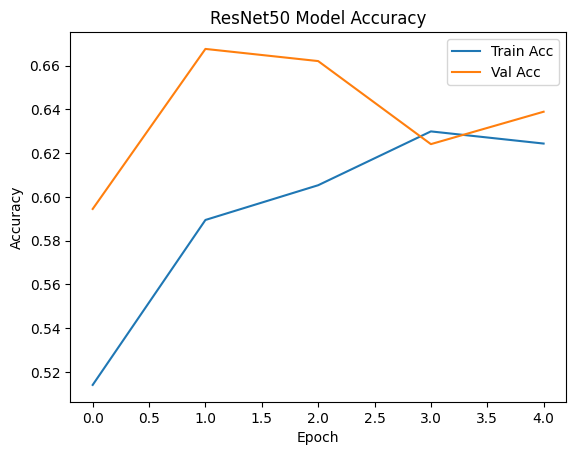

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Download & define paths
dataset_path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")
dataset_path = os.path.join(dataset_path, "Knee Osteoarthritis Classification")

train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

# Step 2: Image settings
img_size = (224, 224)  # ResNet50 default input size
batch_size = 32
num_classes = 3

# Step 3: Image generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size,
    class_mode='categorical')

# Step 4: Load base ResNet50 (pretrained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Step 6: Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history_resnet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=3
)

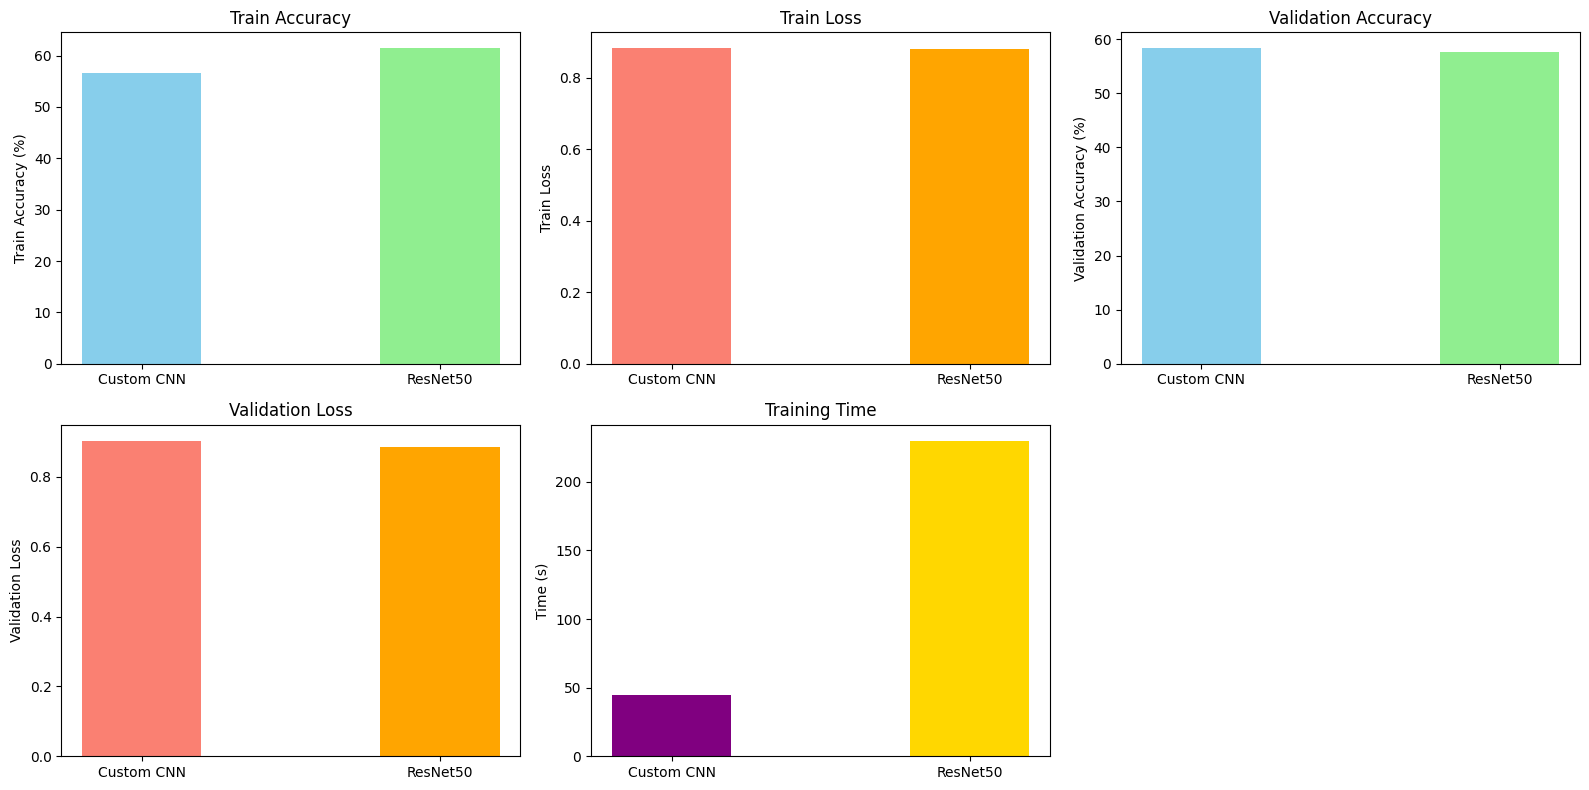

In [ ]:
import matplotlib.pyplot as plt

# === Extract Metrics === #
cnn_train_acc = history_cnn.history['accuracy'][-1] * 100
cnn_val_acc = history_cnn.history['val_accuracy'][-1] * 100
cnn_train_loss = history_cnn.history['loss'][-1]
cnn_val_loss = history_cnn.history['val_loss'][-1]

resnet_train_acc = history_resnet.history['accuracy'][-1] * 100
resnet_val_acc = history_resnet.history['val_accuracy'][-1] * 100
resnet_train_loss = history_resnet.history['loss'][-1]
resnet_val_loss = history_resnet.history['val_loss'][-1]

# Replace with your recorded training durations
cnn_time = 45  # in seconds
resnet_time = 230  # in seconds

# === Plot Setup === #
labels = ['Custom CNN', 'ResNet50']
bar_width = 0.4
x = [0, 1]

# === Plotting === #
plt.figure(figsize=(16, 8))

# Train Accuracy
plt.subplot(2, 3, 1)
plt.bar(x, [cnn_train_acc, resnet_train_acc], color=['skyblue', 'lightgreen'], width=bar_width)
plt.xticks(x, labels)
plt.ylabel("Train Accuracy (%)")
plt.title("Train Accuracy")

# Train Loss
plt.subplot(2, 3, 2)
plt.bar(x, [cnn_train_loss, resnet_train_loss], color=['salmon', 'orange'], width=bar_width)
plt.xticks(x, labels)
plt.ylabel("Train Loss")
plt.title("Train Loss")

# Validation Accuracy
plt.subplot(2, 3, 3)
plt.bar(x, [cnn_val_acc, resnet_val_acc], color=['skyblue', 'lightgreen'], width=bar_width)
plt.xticks(x, labels)
plt.ylabel("Validation Accuracy (%)")
plt.title("Validation Accuracy")

# Validation Loss
plt.subplot(2, 3, 4)
plt.bar(x, [cnn_val_loss, resnet_val_loss], color=['salmon', 'orange'], width=bar_width)
plt.xticks(x, labels)
plt.ylabel("Validation Loss")
plt.title("Validation Loss")

# Training Time
plt.subplot(2, 3, 5)
plt.bar(x, [cnn_time, resnet_time], color=['purple', 'gold'], width=bar_width)
plt.xticks(x, labels)
plt.ylabel("Time (s)")
plt.title("Training Time")

plt.tight_layout()
plt.show()
